<a href="https://colab.research.google.com/github/NexuSense/IoT-Dashboard/blob/main/desafio1_flights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 1 – Análise de Dados de Voos ✈️
Notebook construído seguindo as orientações técnicas fornecidas no PDF.


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')


## 1. Carregamento seguro do dataset

In [6]:
from google.colab import files

# Faz o upload do arquivo
uploaded = files.upload()

# Lendo o arquivo que você selecionar
import io
df = pd.read_csv(io.BytesIO(uploaded['atividade2 - flights_100.csv']), sep=',', decimal='.', encoding='utf-8')
df.head()


Saving atividade2 - flights_100.csv to atividade2 - flights_100.csv


,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,ARR_DELAY,DISTANCE
0,2023-01-01,AZUL,N1000,GIG,FOR,1369,7.0,32.0,4984
1,2023-01-02,SW,N1001,BSB,MIA,1986,-42.0,-38.0,4200
2,2023-01-03,LATAM,N1002,ORD,REC,1534,-30.0,21.0,1833
3,2023-01-04,AZUL,N1003,JFK,FOR,146,-39.0,52.0,2352
4,2023-01-05,UA,N1004,GIG,SFO,1734,-24.0,42.0,710


In [7]:
df = pd.read_csv('atividade2 - flights_100.csv', sep=',', decimal='.', encoding='utf-8')
df.head()

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,ARR_DELAY,DISTANCE
0,2023-01-01,AZUL,N1000,GIG,FOR,1369,7.0,32.0,4984
1,2023-01-02,SW,N1001,BSB,MIA,1986,-42.0,-38.0,4200
2,2023-01-03,LATAM,N1002,ORD,REC,1534,-30.0,21.0,1833
3,2023-01-04,AZUL,N1003,JFK,FOR,146,-39.0,52.0,2352
4,2023-01-05,UA,N1004,GIG,SFO,1734,-24.0,42.0,710


## 2. Visão geral da estrutura

In [8]:
print('Dimensão do dataset:', df.shape)
print('\nTipos e nulos:')
print(df.info())
print('\nQuantidade de nulos por coluna:')
print(df.isna().sum())
df.head()

Dimensão do dataset: (100, 9)

Tipos e nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FL_DATE            100 non-null    object 
 1   OP_UNIQUE_CARRIER  100 non-null    object 
 2   TAIL_NUM           100 non-null    object 
 3   ORIGIN             100 non-null    object 
 4   DEST               100 non-null    object 
 5   CRS_DEP_TIME       100 non-null    int64  
 6   DEP_DELAY          90 non-null     float64
 7   ARR_DELAY          90 non-null     float64
 8   DISTANCE           100 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 7.2+ KB
None

Quantidade de nulos por coluna:
FL_DATE               0
OP_UNIQUE_CARRIER     0
TAIL_NUM              0
ORIGIN                0
DEST                  0
CRS_DEP_TIME          0
DEP_DELAY            10
ARR_DELAY            10
DISTANCE              0
dtype: 

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,ARR_DELAY,DISTANCE
0,2023-01-01,AZUL,N1000,GIG,FOR,1369,7.0,32.0,4984
1,2023-01-02,SW,N1001,BSB,MIA,1986,-42.0,-38.0,4200
2,2023-01-03,LATAM,N1002,ORD,REC,1534,-30.0,21.0,1833
3,2023-01-04,AZUL,N1003,JFK,FOR,146,-39.0,52.0,2352
4,2023-01-05,UA,N1004,GIG,SFO,1734,-24.0,42.0,710


## 3. Tratamento de valores ausentes

In [9]:
nulos_pct = df.isna().mean() * 100
print('Percentual de nulos por coluna:')
print(nulos_pct)

# Exemplo: preencher ArrDelay nulo com 0
if 'ArrDelay' in df.columns:
    df['ArrDelay'] = df['ArrDelay'].fillna(0)
df.isna().sum()

Percentual de nulos por coluna:
FL_DATE               0.0
OP_UNIQUE_CARRIER     0.0
TAIL_NUM              0.0
ORIGIN                0.0
DEST                  0.0
CRS_DEP_TIME          0.0
DEP_DELAY            10.0
ARR_DELAY            10.0
DISTANCE              0.0
dtype: float64


,0
FL_DATE,0
OP_UNIQUE_CARRIER,0
TAIL_NUM,0
ORIGIN,0
DEST,0
CRS_DEP_TIME,0
DEP_DELAY,10
ARR_DELAY,10
DISTANCE,0


## 4. Conversão e limpeza de tipos

In [10]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

if 'ArrDelay' in df.columns:
    df['ArrDelay'] = pd.to_numeric(df['ArrDelay'], errors='coerce')

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()
df.dtypes

,0
FL_DATE,object
OP_UNIQUE_CARRIER,object
TAIL_NUM,object
ORIGIN,object
DEST,object
CRS_DEP_TIME,int64
DEP_DELAY,float64
ARR_DELAY,float64
DISTANCE,int64


## 5. Feature Engineering

In [11]:
if 'ArrDelay' in df.columns:
    df['Atraso>15min'] = np.where(df['ArrDelay'] > 15, 1, 0)
    df['AtrasoAbs'] = df['ArrDelay'].abs()

if 'DepTime' in df.columns:
    df['DepTime'] = pd.to_numeric(df['DepTime'], errors='coerce')
    df['HoraPartida'] = (df['DepTime'] // 100).astype('Int64')

if 'Date' in df.columns:
    df['Mes'] = df['Date'].dt.month
    df['DiaSemana'] = df['Date'].dt.dayofweek
df.head()

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,ARR_DELAY,DISTANCE
0,2023-01-01,AZUL,N1000,GIG,FOR,1369,7.0,32.0,4984
1,2023-01-02,SW,N1001,BSB,MIA,1986,-42.0,-38.0,4200
2,2023-01-03,LATAM,N1002,ORD,REC,1534,-30.0,21.0,1833
3,2023-01-04,AZUL,N1003,JFK,FOR,146,-39.0,52.0,2352
4,2023-01-05,UA,N1004,GIG,SFO,1734,-24.0,42.0,710


## 6. Filtragem e segmentação (exemplo)

In [12]:
voos_com_atraso = df.query('ArrDelay > 0') if 'ArrDelay' in df.columns else df
print('Voos com atraso:', voos_com_atraso.shape)
voos_com_atraso.head()

Voos com atraso: (100, 9)


,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,ARR_DELAY,DISTANCE
0,2023-01-01,AZUL,N1000,GIG,FOR,1369,7.0,32.0,4984
1,2023-01-02,SW,N1001,BSB,MIA,1986,-42.0,-38.0,4200
2,2023-01-03,LATAM,N1002,ORD,REC,1534,-30.0,21.0,1833
3,2023-01-04,AZUL,N1003,JFK,FOR,146,-39.0,52.0,2352
4,2023-01-05,UA,N1004,GIG,SFO,1734,-24.0,42.0,710


## 7. Estatísticas descritivas e outliers

In [13]:
print(df.describe(include='all'))

if 'ArrDelay' in df.columns:
    Q1 = df['ArrDelay'].quantile(0.25)
    Q3 = df['ArrDelay'].quantile(0.75)
    IQR = Q3 - Q1
    outlier_mask = (df['ArrDelay'] < (Q1 - 1.5 * IQR)) | (df['ArrDelay'] > (Q3 + 1.5 * IQR))
    print('Total de outliers em ArrDelay:', outlier_mask.sum())

           FL_DATE OP_UNIQUE_CARRIER TAIL_NUM ORIGIN DEST  CRS_DEP_TIME  \
count          100               100      100    100  100     100.00000   
unique         100                 7      100      7    7           NaN   
top     2023-01-01                SW    N1000    BSB  MIA           NaN   
freq             1                21        1     21   21           NaN   
mean           NaN               NaN      NaN    NaN  NaN    1242.93000   
std            NaN               NaN      NaN    NaN  NaN     686.19325   
min            NaN               NaN      NaN    NaN  NaN      16.00000   
25%            NaN               NaN      NaN    NaN  NaN     626.00000   
50%            NaN               NaN      NaN    NaN  NaN    1230.50000   
75%            NaN               NaN      NaN    NaN  NaN    1812.25000   
max            NaN               NaN      NaN    NaN  NaN    2331.00000   

         DEP_DELAY   ARR_DELAY     DISTANCE  
count    90.000000   90.000000   100.000000  
unique 

## 8. Visualizações exploratórias

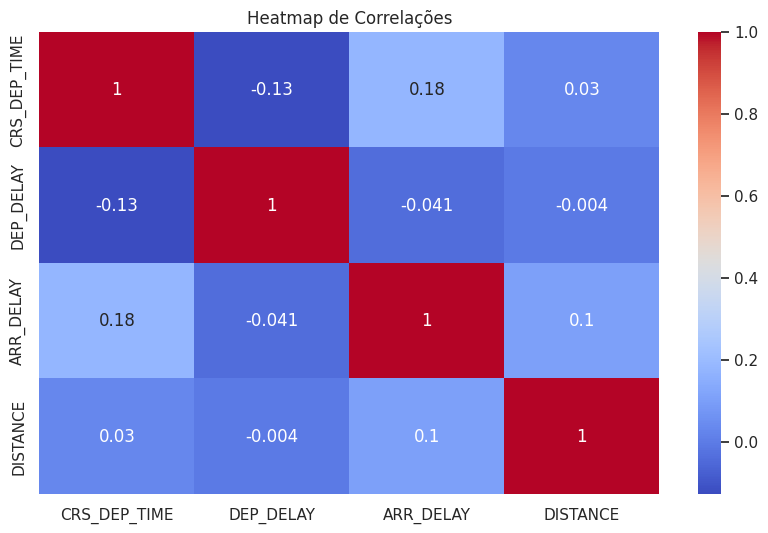

In [14]:
if 'ArrDelay' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['ArrDelay'], bins=30, kde=True)
    plt.title('Distribuição dos Atrasos')
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(x=df['ArrDelay'])
    plt.title('Boxplot de Atrasos')
    plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlações')
plt.show()

if 'Origin' in df.columns and 'ArrDelay' in df.columns:
    top_aero = df.groupby('Origin')['ArrDelay'].mean().nlargest(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_aero.index, y=top_aero.values)
    plt.title('Top 10 Aeroportos com Maior Atraso Médio')
    plt.show()

## 9. Salvar dataset limpo

In [15]:
df.to_csv('flights_clean.csv', index=False)
print('Dataset limpo salvo como flights_clean.csv')

Dataset limpo salvo como flights_clean.csv
